In [1]:
from pylab import *
from matplotlib import cm

In [2]:
def Pot_R(th,V0=1,N=50):
    pot = zeros(len(th))
    for n in range(N):
        pot += (4*V0*sin((2*n+1)*th))/((2*n+1)*pi)
    return -pot

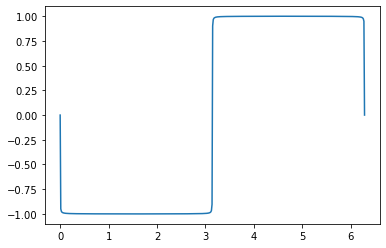

In [3]:
th = linspace(0,2*pi,500)
V = Pot_R(th,N=500)
plot(th,V)
show()

Potencial adentro:
$$
V_{adentro}(\rho , \theta) = -\sum _{n=0} ^{\infty} \frac{4V_0}{(2n+1)\pi}
\left( \frac{\rho}{R} \right) ^{2n+1} \sin ((2n+1)\theta)
$$

Potencial afuera:

$$
V_{afuera}(\rho , \theta) = -\sum _{n=0} ^{\infty} \frac{4V_0}{(2n+1)\pi}
\left( \frac{R}{\rho} \right) ^{2n+1} \sin ((2n+1)\theta)
$$

In [16]:
def Pot_xy(x,y,V0=1,R=1,N=50):
    Nx , Ny = len(x) , len(y)
    pot = zeros( (Nx,Ny) )
    for i in range(Nx):
        for j in range(Ny):
            rho = sqrt( x[i]**2 + y[j]**2 )
            th = arctan2( y[j], x[i])
            for n in range(N):
                if rho > R:
                    pot[j,i] += (4*V0*(R**(2*n+1))*sin((2*n+1)*th))/((2*n+1)*pi*(rho**(2*n+1)))
                elif rho <= R:
                    pot[j,i] += (4*V0*(rho**(2*n+1))*sin((2*n+1)*th))/((2*n+1)*pi*(R**(2*n+1)))
    return -pot

In [23]:
x , y = linspace(-5,5,200) , linspace(-5,5,200)
V = Pot_xy(x,y)

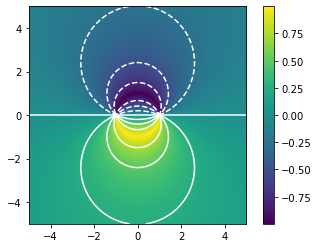

In [24]:
imshow(V,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
XX , YY = meshgrid(x,y)
contour(XX,YY,V,colors='white')
gca().set_aspect('equal')
show()

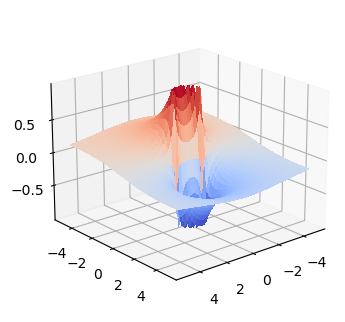

In [26]:
figura , ejes = subplots(subplot_kw={"projection":"3d"},dpi=100)
ejes.plot_surface(XX,YY,V,cmap=cm.coolwarm,antialiased=False)
ejes.view_init(20,50)
show()

In [27]:
x , y = linspace(-1,1,200) , linspace(-1,1,200)
V = Pot_xy(x,y)

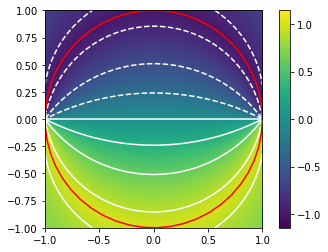

In [29]:
imshow(V,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
XX , YY = meshgrid(x,y)
contour(XX,YY,V,colors='white')
th = linspace(0,2*pi)
plot(cos(th) , sin(th) , color='red')
gca().set_aspect('equal')
show()